In [1]:
from bs4 import BeautifulSoup
import requests
import json
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

C:\Users\jakub\AppData\Local\Temp\ipykernel_13008\370315329.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure()


<Figure size 640x480 with 0 Axes>

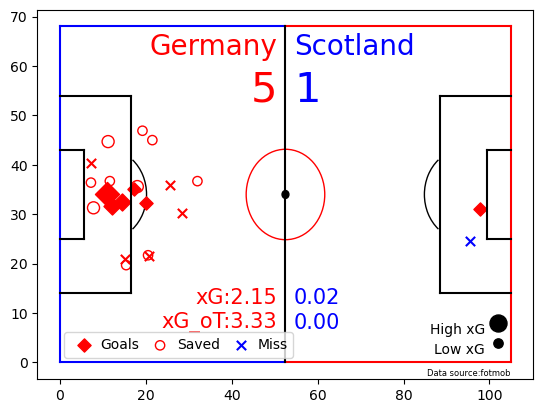

<Figure size 640x480 with 0 Axes>

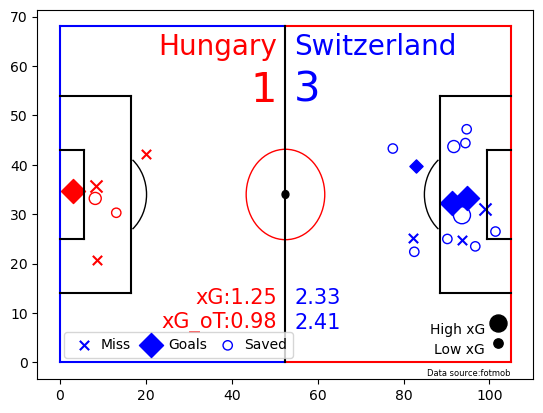

<Figure size 640x480 with 0 Axes>

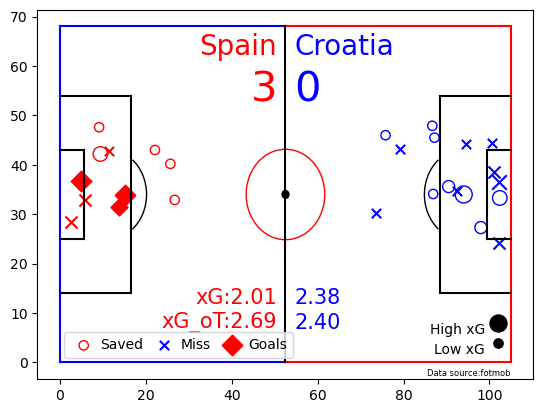

<Figure size 640x480 with 0 Axes>

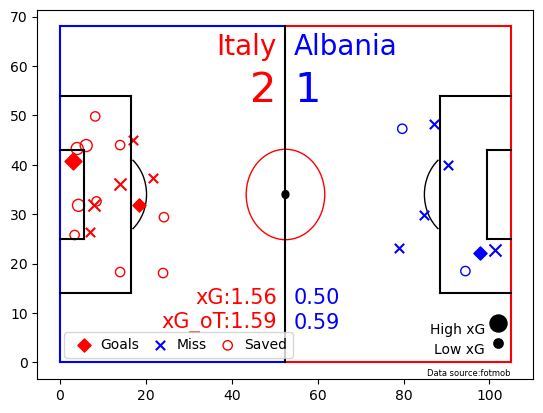

<Figure size 640x480 with 0 Axes>

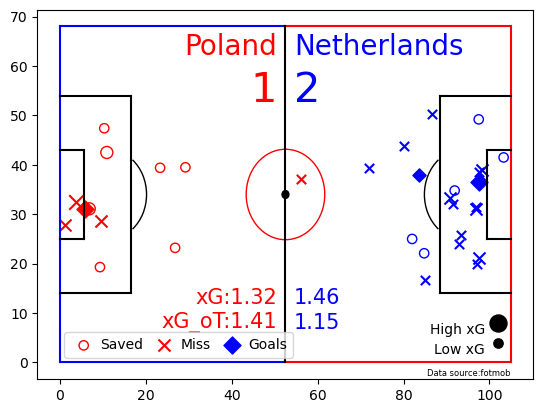

<Figure size 640x480 with 0 Axes>

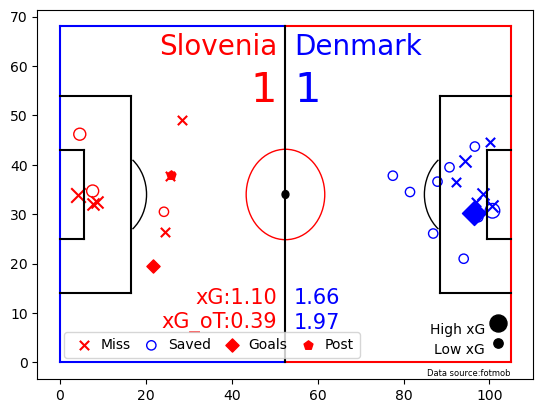

<Figure size 640x480 with 0 Axes>

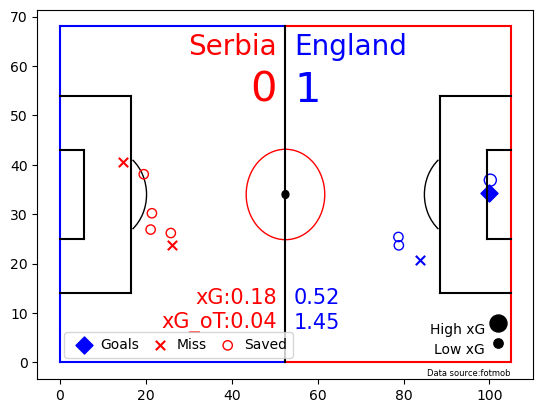

<Figure size 640x480 with 0 Axes>

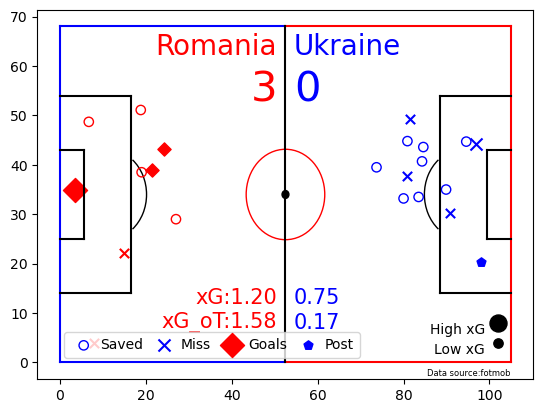

<Figure size 640x480 with 0 Axes>

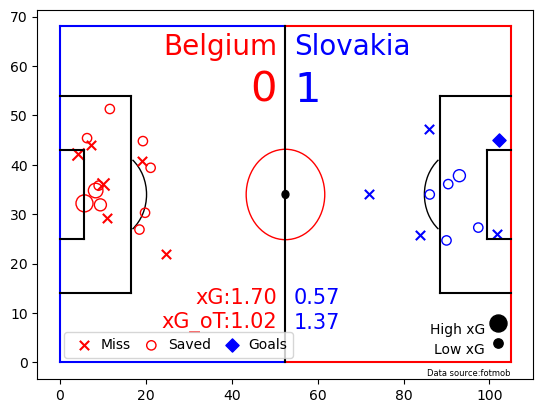

<Figure size 640x480 with 0 Axes>

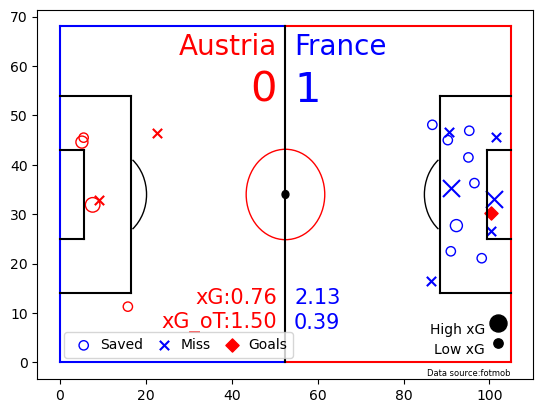

<Figure size 640x480 with 0 Axes>

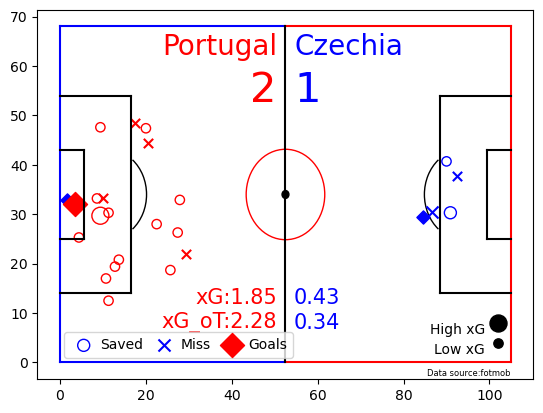

<Figure size 640x480 with 0 Axes>

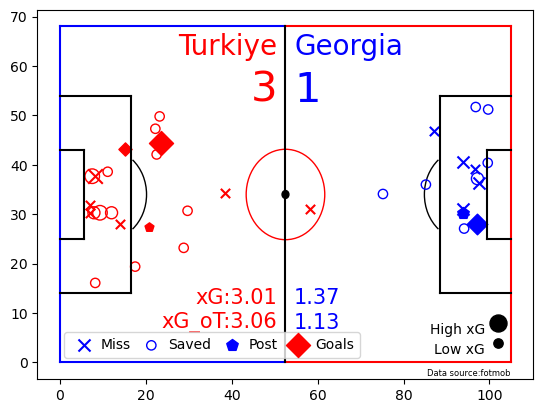

<Figure size 640x480 with 0 Axes>

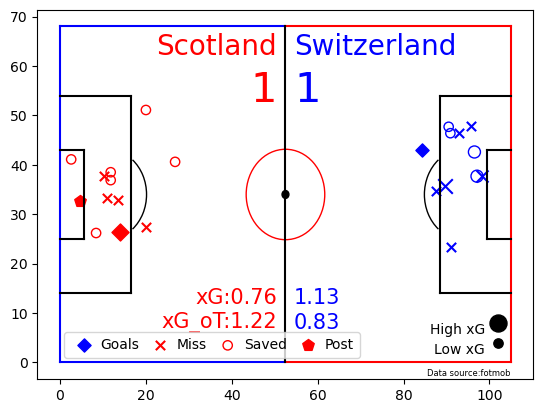

<Figure size 640x480 with 0 Axes>

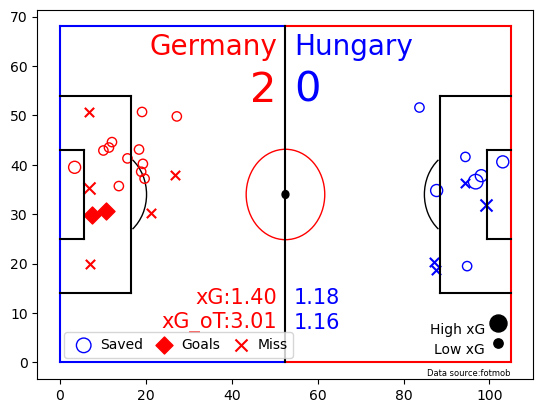

<Figure size 640x480 with 0 Axes>

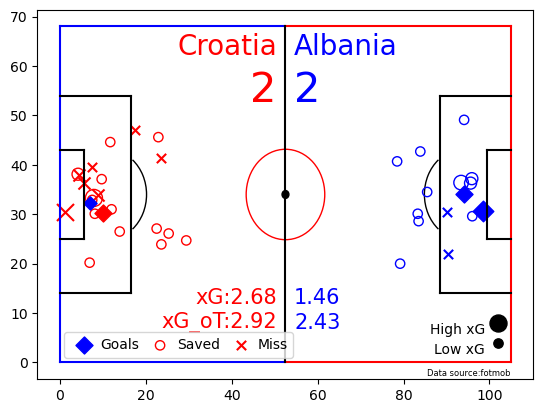

<Figure size 640x480 with 0 Axes>

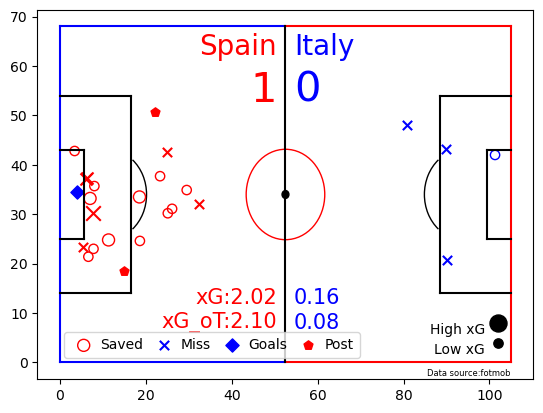

<Figure size 640x480 with 0 Axes>

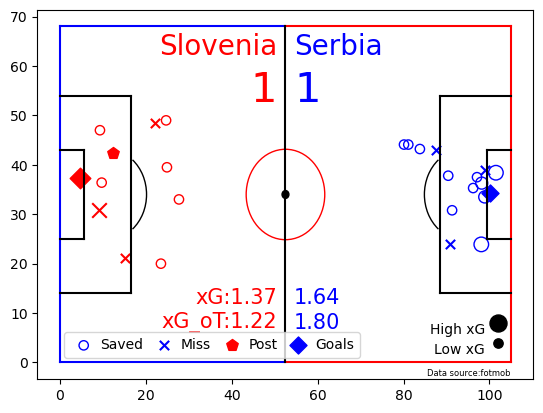

<Figure size 640x480 with 0 Axes>

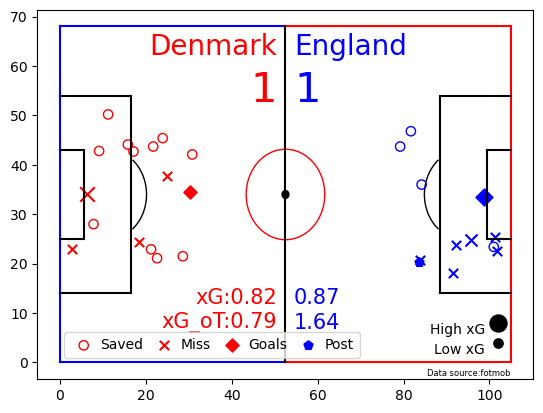

<Figure size 640x480 with 0 Axes>

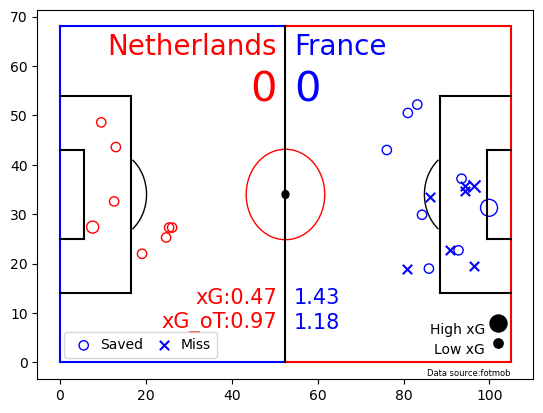

<Figure size 640x480 with 0 Axes>

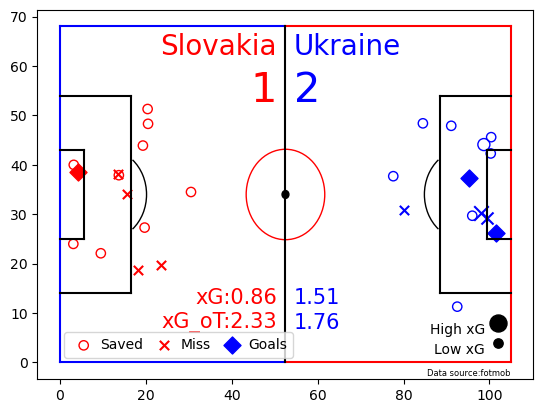

<Figure size 640x480 with 0 Axes>

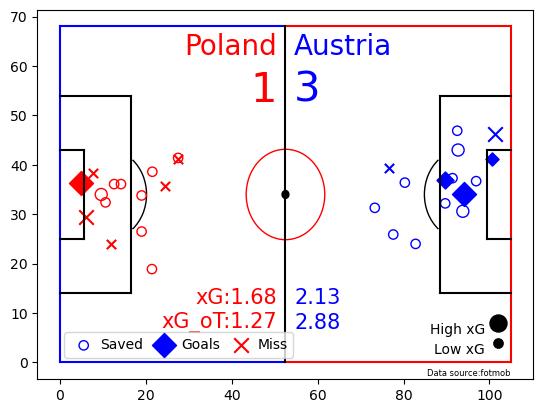

<Figure size 640x480 with 0 Axes>

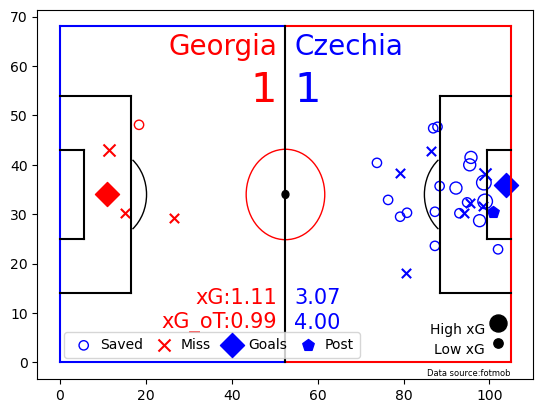

<Figure size 640x480 with 0 Axes>

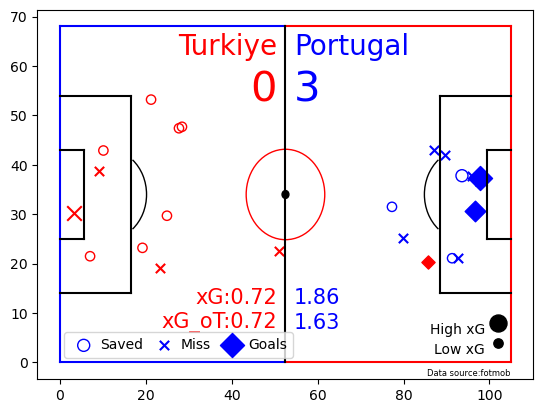

<Figure size 640x480 with 0 Axes>

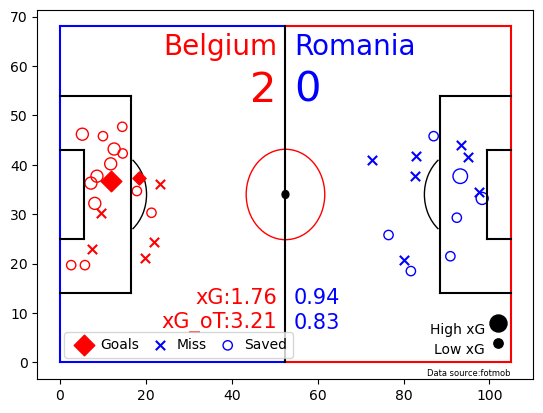

<Figure size 640x480 with 0 Axes>

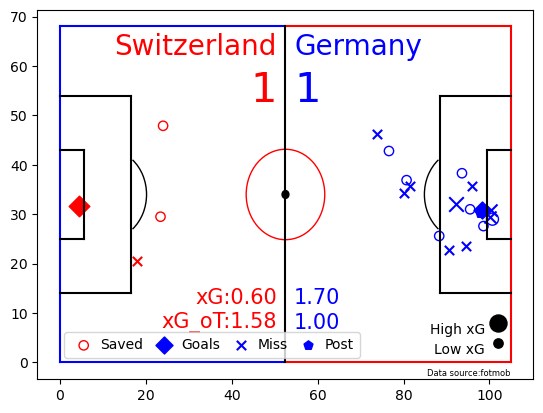

<Figure size 640x480 with 0 Axes>

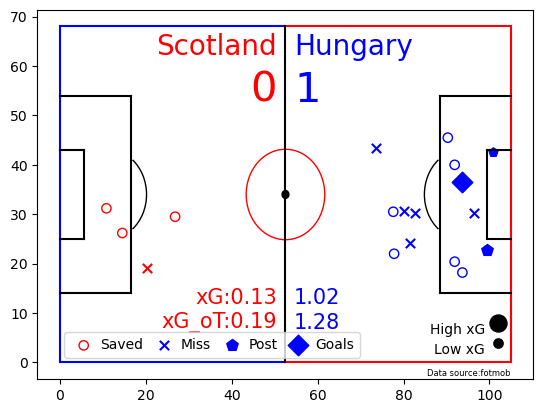

In [137]:
main()

In [136]:
def main():
    ID_list = ['4043837','4043838','4043843','4043844','4043855','4043850','4043849','4043862','4043861','4043856','4043867','4043868','4043839','4043840','4043845','4043846','4043852','4043851','4043858','4043863','4043857','4043869','4043870','4043864','4043841','4043842']
    #ID_list = ['4043858']#,'4043863','4043857']#
    for ID in ID_list:
        df_mrg = get_shots(ID)[0]
        df_names = get_shots(ID)[1]
        draw_figure(df_mrg,df_names)

In [41]:
def pitch_custom_fcpython_wait(x,y):
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    #fig.patch.set_facecolor('green')
        
    plt.plot([0,0],[0,y], color="blue")
    plt.plot([0,x/2],[y,y], color="blue")
    plt.plot([x/2,x],[y,y], color="red")
    plt.plot([x,x],[y,0], color="red")
    plt.plot([x,x/2],[0,0], color="red")
    plt.plot([x/2,0],[0,0], color="blue")
    plt.plot([x/2,x/2],[0,y], color="black")

    #Assign circles to variables - do not fill the centre circle!
    centreCircle = plt.Circle((x/2,y/2),9.15,color="red",fill=False)
    centreSpot = plt.Circle((x/2,y/2),0.8,color="black")

    #Draw the circles to our plot
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)

    #Left Penalty Area
    plt.plot([16.5,16.5],[y/2-20,y/2+20],color="black")
    plt.plot([0,16.5],[y/2+20,y/2+20],color="black")
    plt.plot([16.5,0],[y/2-20,y/2-20],color="black")

    #Right Penalty Area
    plt.plot([x,x-16.5],[y/2+20,y/2+20],color="black")
    plt.plot([x-16.5,x-16.5],[y/2+20,y/2-20],color="black")
    plt.plot([x-16.5,x],[y/2-20,y/2-20],color="black")

    #Left 6-yard Box
    plt.plot([0,5.5],[y/2+9,y/2+9],color="black")
    plt.plot([5.5,5.5],[y/2+9,y/2-9],color="black")
    plt.plot([5.5,0],[y/2-9,y/2-9],color="black")

    #Right 6-yard Box
    plt.plot([x,x-5.5],[y/2+9,y/2+9],color="black")
    plt.plot([x-5.5,x-5.5],[y/2+9,y/2-9],color="black")
    plt.plot([x-5.5,x],[y/2-9,y/2-9],color="black")

    #Prepare Arcs
    leftArc = Arc((11,y/2),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((x-11,y/2),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

In [28]:
def get_shots(matchId):
    params = {
        'matchId': matchId,
    }
    response = requests.get('https://www.fotmob.com/api/matchDetails', params=params)
    data = response.json()
    shotmap = data['content']['shotmap']['shots']
    df = pd.DataFrame(shotmap)
    df = df.filter(items = ['teamId','eventType','playerName','min','x','y','expectedGoals','expectedGoalsOnTarget'])
    df = df.rename(columns={"expectedGoals": "xg_shot", "expectedGoalsOnTarget": "xg_OT_shot"})

    league = []
    gameweek = []
    season = []
    team = []
    team_id = []
    xg_total = []
    score = []
    xg_non_pen_total = []
    xg_on_target_total = []
    matchIDtab = []

    team.append(data['general']['homeTeam']['name'])
    team.append(data['general']['awayTeam']['name'])
    team_id.append(data['general']['homeTeam']['id'])
    team_id.append(data['general']['awayTeam']['id'])
    #this is a little bit not efficient - doubling everything
    league.append(data['general']['leagueName'])
    league.append(data['general']['leagueName'])
    gameweek.append(data['general']['leagueRoundName'])
    gameweek.append(data['general']['leagueRoundName'])
    season.append(data['general']['parentLeagueSeason'])
    season.append(data['general']['parentLeagueSeason'])
    score.append(data['header']['teams'][0]['score'])
    score.append(data['header']['teams'][1]['score'])
    matchIDtab.append(matchId)
    matchIDtab.append(matchId)
    xg_total = data['content']['stats']['Periods']['All']['stats'][0]['stats'][1]['stats']
    xg_non_pen_total = data['content']['stats']['Periods']['All']['stats'][2]['stats'][4]['stats']
    xg_on_target_total = data['content']['stats']['Periods']['All']['stats'][2]['stats'][5]['stats']
    
    col_name = ['TeamName','teamId','goals','xg_total','xg_OT_total','xg_NP_total','league','gameweek','season','matchID']
    df_names = pd.DataFrame([team,team_id,score,xg_total,xg_on_target_total,xg_non_pen_total,league,gameweek,season,matchIDtab],index=col_name)
    df_names = df_names.T

    df['teamId'] = df['teamId'].astype(str)
    df_names['teamId'] = df_names['teamId'].astype(str)
    df_mrg = pd.merge(df, df_names, on="teamId", how="left")
            
    df_mrg['x'] =   df_mrg['x'].apply(lambda x: round(x, 1))
    df_mrg['y'] =   df_mrg['y'].apply(lambda x: round(x, 1))
    df_mrg['xg_shot'] =   df_mrg['xg_shot'].apply(lambda x: round(x, 2))
    df_mrg['xg_OT_shot'] =   df_mrg['xg_OT_shot'].apply(lambda x: round(x, 2))
    
    df_summary = df_mrg
    df_summary = df_summary.drop_duplicates(subset = 'teamId')
    df_summary = df_summary.filter(items = ['matchID','teamId','TeamName','goals','xg_total','xg_OT_total','xg_NP_total','league','gameweek','season'])

    path1 =  r'C:/Users/jakub/Documents/kursy/python/python_mckay/shots_'+team[0]+'_vs_'+team[1]+'.xlsx' 
    with pd.ExcelWriter(path1) as writer:
        df_mrg.to_excel(writer, sheet_name="Shots")
        df_summary.to_excel(writer, sheet_name="Summary")
    return df_mrg,df_names

In [131]:
def draw_figure(df_mrg,df_names):
    
    pitch_len = 105
    pitch_width = 68
    pd.options.mode.chained_assignment = None  # default='warn'
    for index in range(len(df_mrg.TeamName)):
        if df_mrg.TeamName[index] == df_names.TeamName[0]:
            df_mrg.x[index] = pitch_len - df_mrg.x[index]
            df_mrg.y[index] = pitch_width - df_mrg.y[index]
        
    fig=plt.figure()
    pitch_custom_fcpython_wait(pitch_len,pitch_width)
             
    scatter_objects = {}
    labels = {}    
    
    for index in range(len(df_mrg.TeamName)):
        temp = 100 * df_mrg['xg_shot'][index]
        if temp > 50:
            scalar = 150
        elif temp > 25:
            scalar = 110
        elif temp > 10:
            scalar = 75
        else:
            scalar = 45
        
        if df_mrg.TeamName[index] == df_names.TeamName[0]:
            if df_mrg.eventType[index] == 'Goal':
                scatter_objects['goals'] = plt.scatter(df_mrg['x'][index],df_mrg['y'][index],color='red', marker = "D", s = scalar)
                labels['goals'] = 'Goals'
            elif df_mrg.eventType[index] == 'AttemptSaved':
                scatter_objects['saved'] = plt.scatter(df_mrg['x'][index],df_mrg['y'][index],color='red', marker = "o",facecolors='none', s = scalar)
                labels['saved'] = 'Saved'
            elif df_mrg.eventType[index] == 'Post':
                scatter_objects['post'] = plt.scatter(df_mrg['x'][index],df_mrg['y'][index],color='red', marker = "p",s = scalar)
                labels['post'] = 'Post'
            elif df_mrg.eventType[index] == 'Miss':
                scatter_objects['miss'] = plt.scatter(df_mrg['x'][index],df_mrg['y'][index],color='red', marker = "x",s = scalar)
                labels['miss'] = 'Miss'
        else:
            if df_mrg.eventType[index] == 'Goal': 
                scatter_objects['goals'] = plt.scatter(df_mrg['x'][index],df_mrg['y'][index],color='blue', marker = "D", s = scalar)
                labels['goals'] = 'Goals'
            elif df_mrg.eventType[index] == 'AttemptSaved':
                scatter_objects['saved'] = plt.scatter(df_mrg['x'][index],df_mrg['y'][index],color='blue', marker = "o",facecolors='none', s = scalar)
                labels['saved'] = 'Saved'
            elif df_mrg.eventType[index] == 'Post':
                scatter_objects['post'] = plt.scatter(df_mrg['x'][index],df_mrg['y'][index],color='blue', marker = "p", s = scalar)
                labels['post'] = 'Post'
            elif df_mrg.eventType[index] == 'Miss':
                scatter_objects['miss'] = plt.scatter(df_mrg['x'][index],df_mrg['y'][index],color='blue', marker = "x", s = scalar)
                labels['miss'] = 'Miss'
    
    plt.text(pitch_len/2 - 2, pitch_width-7, df_names.TeamName[0],ha='right', va='bottom', fontsize = 20, color='red')
    plt.text(pitch_len/2 + 2, pitch_width-7, df_names.TeamName[1],ha='left', va='bottom', fontsize = 20, color='blue')

    plt.text(pitch_len/2 - 2, pitch_width-17, df_names.goals[0],ha='right', va='bottom', fontsize = 30, color='red')
    plt.text(pitch_len/2 + 2, pitch_width-17, df_names.goals[1],ha='left', va='bottom', fontsize = 30, color='blue')

    xghome = 'xG:' + df_names.xg_total[0]
    plt.text(pitch_len/2 - 2, 11, xghome,ha='right', va='bottom', fontsize = 15, color='red')
    plt.text(pitch_len/2 + 2, 11, df_names.xg_total[1],ha='left', va='bottom', fontsize = 15, color='blue')
    
    xg_ot_home = 'xG_oT:' + df_names.xg_OT_total[0]
    plt.text(pitch_len/2 - 2, 6, xg_ot_home,ha='right', va='bottom', fontsize = 15, color='red')
    plt.text(pitch_len/2 + 2, 6, df_names.xg_OT_total[1],ha='left', va='bottom', fontsize = 15, color='blue')
    plt.text(pitch_len, -3, 'Data source:fotmob',ha='right', va='bottom', fontsize = 6, color='black')
    
    plt.scatter(pitch_len-3, 8, s=150, color='black', marker='o')
    plt.text(pitch_len-6, 8, 'High xG', ha='right', va='top', fontsize=10, color='black')
    plt.scatter(pitch_len-3, 4, s=45, color='black', marker='o')
    plt.text(pitch_len-6, 4, 'Low xG', ha='right', va='top', fontsize=10, color='black')
    
    # Prepare lists for legend
    handles = [scatter_objects[key] for key in scatter_objects]
    legend_labels = [labels[key] for key in labels]

    # Create the legend with non-empty entries
    plt.legend(handles, legend_labels, ncol=4, loc='lower left', bbox_to_anchor=(0.04, 0.04), handletextpad=0.2, columnspacing=0.5, labelspacing=0.3)
    plt.savefig('C:/Users/aaa/shots_euro/shots_map_'+df_names.TeamName[0]+'_vs_'+df_names.TeamName[1]+'.png')